# Inumet - Data Ext
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@version**: v1.2
 - **@date**: 2022-08-06, 2022-08-01, 2022-07-30, 2022-07-26
 - **Url**:  
 - **See**:   
 - **Output**: inumet_daily_2000_2020_ext.nc

## Setup

In [1]:
dir_google_drive = "/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/Proyecto Colab/04 - Data Ext"
dir_data = './data/'
dir_data_source = dir_data+'/source/'
dir_var = './var/'
dir_download = dir_var+'/download/'
dir_output = dir_var+'/output/'
dir_log = dir_var+'/log/'



### Libraries

In [2]:
# https://pypi.org/project/wget/
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=dead87601960bc46d172942ceb28e07f0efee58a97d00b5c2e59ff15c362437f
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [3]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 3.2 MB/s 
     |████████████████████████████████| 16.7 MB 34.7 MB/s 
     |████████████████████████████████| 6.3 MB 45.2 MB/s 


In [4]:
# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Utils
import wget
import os 
import shutil
import glob

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [5]:
# Geo elevation data parser for "The Shuttle Radar Topography Mission" data
!pip install SRTM.py

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 99 kB 3.7 MB/s 
  Created wheel for SRTM.py: filename=SRTM.py-0.3.7-py3-none-any.whl size=105861 sha256=26d733d8b81af64f8ef37b84b3efa2f21afadedb275ba472129565624d148dc0
  Stored in directory: /root/.cache/pip/wheels/f4/c7/b2/2469a4747bd19d3af08be5cada09cda02c00f29d472e9e3461
Successfully built SRTM.py


In [6]:
# https://www.usna.edu/Users/oceano/pguth/md_help/html/srtm.htm
# importante el siguiente link
# http://viewfinderpanoramas.org/Coverage%20map%20viewfinderpanoramas_org3.htm 
#  for f in ['SG21','SG22',   'SH21','SH22',  'SI21','SI22',  'SJ21']:

%%bash
mkdir -p /content/var/log
mkdir -p /content/var/download
mkdir -p /root/.cache/srtm/

cat > /content/var/download/download.txt << EOF
http://viewfinderpanoramas.org/dem3/SG21.zip 
http://viewfinderpanoramas.org/dem3/SG22.zip 
http://viewfinderpanoramas.org/dem3/SH21.zip 
http://viewfinderpanoramas.org/dem3/SH22.zip 
http://viewfinderpanoramas.org/dem3/SI21.zip 
http://viewfinderpanoramas.org/dem3/SI22.zip 
http://viewfinderpanoramas.org/dem3/SJ21.zip 
EOF

wget  -P /content/var/download \
      --no-clobber --continue --wait=1 \
      -o /content/var/log/wget.log \
      -i "/content/var/download/download.txt"  

unzip -o /content/var/download/SG22.zip  -d /content/var/download/
unzip -o /content/var/download/SG22.zip  -d /content/var/download/
unzip -o /content/var/download/SH21.zip  -d /content/var/download/
unzip -o /content/var/download/SH22.zip  -d /content/var/download/
unzip -o /content/var/download/SI21.zip  -d /content/var/download/
unzip -o /content/var/download/SI22.zip  -d /content/var/download/
unzip -o /content/var/download/SJ21.zip  -d /content/var/download/

mv -v /content/var/download/G22/*  /root/.cache/srtm
mv -v /content/var/download/G22/*  /root/.cache/srtm
mv -v /content/var/download/H21/*  /root/.cache/srtm
mv -v /content/var/download/H22/*  /root/.cache/srtm
mv -v /content/var/download/I21/*  /root/.cache/srtm
mv -v /content/var/download/I22/*  /root/.cache/srtm
mv -v /content/var/download/J21/*  /root/.cache/srtm

ls -lhas /root/.cache/srtm/ 

Archive:  /content/var/download/SG22.zip
   creating: /content/var/download/G22/
  inflating: /content/var/download/G22/S25W049.hgt  
  inflating: /content/var/download/G22/S25W050.hgt  
  inflating: /content/var/download/G22/S25W051.hgt  
  inflating: /content/var/download/G22/S25W052.hgt  
  inflating: /content/var/download/G22/S25W053.hgt  
  inflating: /content/var/download/G22/S25W054.hgt  
  inflating: /content/var/download/G22/S26W049.hgt  
  inflating: /content/var/download/G22/S26W050.hgt  
  inflating: /content/var/download/G22/S26W051.hgt  
  inflating: /content/var/download/G22/S26W052.hgt  
  inflating: /content/var/download/G22/S26W053.hgt  
  inflating: /content/var/download/G22/S26W054.hgt  
  inflating: /content/var/download/G22/S27W049.hgt  
  inflating: /content/var/download/G22/S27W050.hgt  
  inflating: /content/var/download/G22/S27W051.hgt  
  inflating: /content/var/download/G22/S27W052.hgt  
  inflating: /content/var/download/G22/S27W053.hgt  
  inflating: /cont

mv: cannot stat '/content/var/download/G22/*': No such file or directory


In [7]:
import srtm
elevation_data = srtm.get_data()

# Check if is NaN
def is_nan(x):
    return (x != x)
    
def get_elevation(lat, lon):
    if is_nan(lat):
        return ''
    if is_nan(lon):
        return ''
    
    return elevation_data.get_elevation(lat,lon,approximate=True)

In [8]:
def fill_altitude(ds_xr):
  # ndarray_date = ds_xr.coords['time'].values		
  ndarray_lat = ds_xr.coords['lat'].values		
  ndarray_lon = ds_xr.coords['lon'].values	

  df_lat_lon = []

  for lat in ndarray_lat:
    for lon in ndarray_lon:
      df_lat_lon.append([lat,lon])

  df_lat_lon = pd.DataFrame(df_lat_lon, columns=['lat','lon'])

  df_lat_lon['alt'] = df_lat_lon.apply(lambda x: get_elevation(x['lat'], x['lon']), axis=1)
  df_lat_lon.set_index(['lat','lon'], inplace=True)

  return df_lat_lon

In [9]:
def get_geometry_uruguay():
  df_world_shapes = gpd.read_file(dir_data+"/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp")
  df_uruguay_shapes = df_world_shapes[ df_world_shapes['ISO2'] == 'UY']
  # df_uruguay_shapes
  polygon_uruguay = df_uruguay_shapes['geometry']
  return polygon_uruguay
  # polygon_uruguay = geometry[210]
  # return gpd.GeoSeries(polygon_uruguay)

### Init

In [10]:
!rm -rf "$dir_data"

!mkdir -p "$dir_data"
!mkdir -p "$dir_data_source"
!mkdir -p "$dir_download"
!mkdir -p "$dir_output"
!mkdir -p "$dir_log"

!mkdir -p "$dir_data"/TM_WORLD_BORDERS
!wget  -O "$dir_download"/TM_WORLD_BORDERS-0.3.zip  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip 
!unzip -o "$dir_download"/TM_WORLD_BORDERS-0.3.zip -d "$dir_data"/TM_WORLD_BORDERS 


--2022-08-06 08:06:37--  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip
Resolving thematicmapping.org (thematicmapping.org)... 67.20.120.230
Connecting to thematicmapping.org (thematicmapping.org)|67.20.120.230|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3464707 (3.3M) [application/zip]
Saving to: ‘./var//download//TM_WORLD_BORDERS-0.3.zip’

./var//download//TM 100%[===================>]   3.30M  6.20MB/s    in 0.5s    

2022-08-06 08:06:38 (6.20 MB/s) - ‘./var//download//TM_WORLD_BORDERS-0.3.zip’ saved [3464707/3464707]

Archive:  ./var//download//TM_WORLD_BORDERS-0.3.zip
  inflating: ./data//TM_WORLD_BORDERS/Readme.txt  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.dbf  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.prj  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shx  


## Download Data

In [11]:
filename = dir_data_source+"/inumet_daily_2000_2020.nc"
!gdown -O $filename "12HtVLC-qJQ3crF9F5oRMWfGtFwmMDVBR"

Downloading...
From: https://drive.google.com/uc?id=12HtVLC-qJQ3crF9F5oRMWfGtFwmMDVBR
To: /content/data/source/inumet_daily_2000_2020.nc
100% 476k/476k [00:00<00:00, 117MB/s]


In [12]:
ds_xr = xr.open_dataset(filename)
ds_xr

<xarray.Dataset>
Dimensions:        (time: 7672, lat: 28, lon: 28)
Coordinates:
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2021-01-01
  * lat            (lat) float32 -34.97 -34.86 -34.83 ... -31.44 -30.9 -30.4
  * lon            (lon) float32 -58.07 -58.04 -58.03 ... -54.39 -54.31 -54.19
Data variables:
    precipitation  (time, lat, lon) float32 ...

## Reordering Dimensions

In [13]:
ds_xr.dims

Frozen({'time': 7672, 'lat': 28, 'lon': 28})

In [14]:
ds_xr_ext = ds_xr.transpose( "time", "lat", "lon")
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7672, lat: 28, lon: 28)
Coordinates:
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2021-01-01
  * lat            (lat) float32 -34.97 -34.86 -34.83 ... -31.44 -30.9 -30.4
  * lon            (lon) float32 -58.07 -58.04 -58.03 ... -54.39 -54.31 -54.19
Data variables:
    precipitation  (time, lat, lon) float32 ...

In [15]:
# ul (upper-left) ur (upper-right)
# ll (lower-left) lr (lower-right)

# We're using coors from  ul (upper-left) 

ds_xr_ext = ds_xr_ext.sortby('time', ascending=True)
ds_xr_ext = ds_xr_ext.sortby('lat', ascending=False)
ds_xr_ext = ds_xr_ext.sortby('lon', ascending=True)
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7672, lat: 28, lon: 28)
Coordinates:
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2021-01-01
  * lat            (lat) float32 -30.4 -30.9 -31.44 ... -34.83 -34.86 -34.97
  * lon            (lon) float32 -58.07 -58.04 -58.03 ... -54.39 -54.31 -54.19
Data variables:
    precipitation  (time, lat, lon) float32 ...

## Add Altitude

In [16]:
df_lat_lon = fill_altitude(ds_xr_ext)
df_lat_lon

alt
lat        lon             
-30.398214 -58.069077  48.0
           -58.036667  54.5
           -58.032001  61.0
           -57.981236  67.5
           -57.767818  36.0
...                     ...
-34.968941 -55.529999   0.0
           -54.951221  15.5
           -54.387341   0.0
           -54.312595   0.0
           -54.193333   0.0

[784 rows x 1 columns]

In [17]:
df_ll_pivot = df_lat_lon.reset_index().pivot(index='lat', columns='lon', values='alt')

# We're using coors from  ul (upper-left) 
df_ll_pivot = df_ll_pivot.sort_index(ascending=False).sort_index(axis=1, ascending=True)

df_ll_pivot


lon,-58.069077,-58.036667,-58.032001,-57.981236,-57.767818,-57.649921,-57.645000,-56.952000,-56.915997,-56.749672,...,-56.012875,-56.000000,-55.873581,-55.630001,-55.542664,-55.529999,-54.951221,-54.387341,-54.312595,-54.193333
lat,,,,,,,,,,,,,,,,,,,,,
-30.398214,48.0,54.5,61.0,67.5,36.0,57.5,57.5,82.0,97.5,139.0,...,226.0,248.5,205.5,203.5,173.0,171.5,102.5,99.0,100.0,155.0
-30.896473,51.0,55.0,57.5,32.0,35.5,88.0,83.0,146.5,178.5,183.5,...,229.5,232.5,292.0,288.0,237.0,210.0,153.5,251.0,288.0,283.5
-31.438545,17.0,13.0,27.0,39.5,45.0,51.0,59.5,138.5,105.5,172.5,...,199.5,268.5,175.0,152.0,137.5,138.0,184.5,148.5,172.0,158.0
-31.709999,43.0,8.0,0.0,36.0,104.5,69.5,72.5,242.0,252.5,168.5,...,149.5,134.5,151.5,118.5,110.5,111.0,193.0,131.0,147.0,186.0
-32.348331,28.5,41.5,37.0,56.0,83.0,104.5,91.5,160.5,135.0,161.0,...,114.5,125.5,107.5,87.5,99.0,92.0,100.5,119.5,133.5,121.5
-32.351665,34.5,28.0,39.5,59.0,90.0,104.5,97.5,169.0,135.5,170.0,...,124.0,126.5,104.0,89.0,108.0,99.0,103.5,120.5,124.5,112.5
-32.686348,30.0,44.5,49.5,41.5,54.0,77.0,83.0,112.5,111.5,70.0,...,73.0,73.0,82.5,117.0,101.0,98.5,165.0,186.5,258.0,170.0
-32.826000,7.0,13.5,16.5,47.0,37.0,53.0,56.5,85.0,93.0,53.0,...,124.5,115.0,93.5,94.5,97.5,118.0,205.0,200.5,118.0,93.0
-33.222862,16.0,16.0,22.5,4.0,75.5,56.0,64.0,50.5,53.0,82.5,...,134.5,143.0,130.5,143.5,152.5,162.5,222.5,46.0,41.5,34.0


In [18]:
# Add altitude
ds_xr_ext['altitude'] = (['lat','lon'], df_ll_pivot.to_numpy())
ds_xr_ext['altitude'] = ds_xr_ext['altitude'].astype(np.float32)
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7672, lat: 28, lon: 28)
Coordinates:
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2021-01-01
  * lat            (lat) float32 -30.4 -30.9 -31.44 ... -34.83 -34.86 -34.97
  * lon            (lon) float32 -58.07 -58.04 -58.03 ... -54.39 -54.31 -54.19
Data variables:
    precipitation  (time, lat, lon) float32 ...
    altitude       (lat, lon) float32 48.0 54.5 61.0 67.5 ... 15.5 0.0 0.0 0.0

In [19]:
# display(ds_xr_ext['altitude'][0,0]) # lat -30.25   lon -58.50   alt 70.5
# display(ds_xr_ext['altitude'][0,2]) # lat -30.25   lon -58.00   alt 65.0
# display(ds_xr_ext['altitude'][2,0]) # lat -30.75   lon -58.50   alt 71.0
# display(ds_xr_ext['altitude'][2,2]) # lat -30.75   lon -58.00   alt 67.5

## Add Meta Data

In [20]:
import datetime 
ds_xr_ext.attrs = {
    'creation_date': '2022-07-27', 
    'author':'Mario Garcia', 
    'email':'mariogarcia.ar@gmail.com',

    'algorithm': 'inumet',
    'url': '',
    'type': 'gauge-based precipitation products',
    'spatial resolution': '',
    'time resolution': '1 day',
    }

# ds_xr_ext['date'].attrs = {'units':'datetime', 'long_name':'Date'}
ds_xr_ext['lat'].attrs = {'units':'decimal degrees', 'long_name':'Latitude'}
ds_xr_ext['lon'].attrs = {'units':'decimal degrees', 'long_name':'Longitude'}
ds_xr_ext

<xarray.Dataset>
Dimensions:        (time: 7672, lat: 28, lon: 28)
Coordinates:
  * time           (time) datetime64[ns] 2000-01-01 2000-01-02 ... 2021-01-01
  * lat            (lat) float32 -30.4 -30.9 -31.44 ... -34.83 -34.86 -34.97
  * lon            (lon) float32 -58.07 -58.04 -58.03 ... -54.39 -54.31 -54.19
Data variables:
    precipitation  (time, lat, lon) float32 ...
    altitude       (lat, lon) float32 48.0 54.5 61.0 67.5 ... 15.5 0.0 0.0 0.0
Attributes:
    creation_date:       2022-07-27
    author:              Mario Garcia
    email:               mariogarcia.ar@gmail.com
    algorithm:           inumet
    url:                 
    type:                gauge-based precipitation products
    spatial resolution:  
    time resolution:     1 day

In [21]:
ds_xr_ext.info()

xarray.Dataset {
dimensions:
	time = 7672 ;
	lat = 28 ;
	lon = 28 ;

variables:
	float32 precipitation(time, lat, lon) ;
	datetime64[ns] time(time) ;
	float32 lat(lat) ;
		lat:units = decimal degrees ;
		lat:long_name = Latitude ;
	float32 lon(lon) ;
		lon:units = decimal degrees ;
		lon:long_name = Longitude ;
	float32 altitude(lat, lon) ;

// global attributes:
	:creation_date = 2022-07-27 ;
	:author = Mario Garcia ;
	:email = mariogarcia.ar@gmail.com ;
	:algorithm = inumet ;
	:url =  ;
	:type = gauge-based precipitation products ;
	:spatial resolution =  ;
	:time resolution = 1 day ;
}

## Export

In [22]:
file_nc = dir_output+'/inumet_daily_2000_2020_ext.nc'
ds_xr_ext.to_netcdf(file_nc)

In [23]:
# Export to drive
!cp "$file_nc" "$dir_google_drive" 

## Plot

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


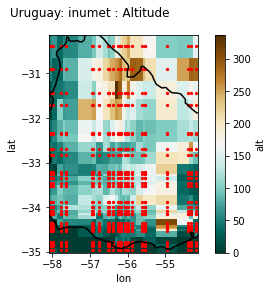

In [24]:
# coordinate reference system
crs={'init':'epsg:4326'}

geodf_shape = get_geometry_uruguay()

geometry=[Point(xy) for xy in zip(df_lat_lon.reset_index()['lon'], df_lat_lon.reset_index()['lat'])]

fig, axs = plt.subplots()  

df_lat_lon.to_xarray()['alt'].plot(ax=axs, cmap="BrBG_r",) #terrain BrBG_r

df_geo_cells = gpd.GeoDataFrame([],crs=crs, geometry=geometry)
df_geo_cells.plot(ax=axs, color='red', markersize=5)

geodf_shape.boundary.plot(ax=axs, color="black")


fig.suptitle(f'Uruguay: inumet : Altitude ', fontsize=12)
plt.show()